# Transfer Learning Thesis

https://thedatafrog.com/en/articles/image-recognition-transfer-learning/

## Imports

In [1]:
# openCV to concatenate
import cv2
import numpy as np

# for image name
import random

# define and move to dataset directory
import os
# the directory where the data is stored
directory = "C:/Users/user/Desktop/Dataset"
os.chdir(directory)

# duplicate combined image to other directory
import shutil

#for stopping code if not the right amount of images
import sys

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#k-fold cross validation
import pandas as pd                                     #store all images and their class/label
from sklearn.model_selection import StratifiedKFold     
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split    #split the dataset to train-test
import tensorflow as tf                                 #for callbacks

## Crop Image to Reduce Background

We shall crop the image in order to reduce the background so that the egg in the image would be more focused on. The cropping procedure will not affect the size diference of the eggs from one another.

https://stackoverflow.com/questions/61927877/how-to-crop-opencv-image-from-center

In [ ]:
tadirect = directory + "/TwoAngleEggs"
#crop width and height
width = 3600
height = 3600

for x in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + x     #images to be cropped
    #print(directory2)
    
    curdir = os.listdir(directory2)
    
    for z in curdir:
        tempim1 = directory2 + "/" + z
        
        im1 = cv2.imread(tempim1)
        
        center = (im1.shape[0] / 2, im1.shape[1] / 2)
        #print(center)
        x = center[0] - width/2
        y = center[1] - height/2

        #print(x)
        #print(y)
        
        #slicing to perform cropping
        print("cropping " + z + " in dimensions (" + str(width) + "," + str(height) + ")")
        crop_img = im1[int(y):int(y+width), int(x):int(x+height)]
        
        #save and replace the image
        cv2.imwrite(tempim1, crop_img)
        print("crop finish " + z)

print("\nAll finished")

## Concatenate two angles of egg

two images of an egg are taken, one at its front and one at its back.

In [2]:
#"""
tadirect = directory + "/TwoAngleEggs"

#needed for k-fold validation later on
image = []

#check if there is the right amount of images (1 for each angle of egg)
for w in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + w
    curdir = os.listdir(directory2)

    #number of files in directory
    filecnt = len([name for name in curdir])
    
    if filecnt%2 == 1:
        print("ERROR (" + w + "): Incorrect number of images.")
        sys.exit()

for x in os.listdir(tadirect):
    directory2 = ""
    directory2 = tadirect + "/" + x                            #where the two images of two angles of egg is stored
    directory3 = directory  + "/CombinedTwoAngleEggs/" + x     #where to put the combined image of the angles
    directory4 = directory  + "/ToBeUsed/" + x                 #where combined and data augmented of the image are stored
    #print(directory2)
    
    curdir = os.listdir(directory2)
    #print(curdir)
    
    #number of files in directory
    filecnt = len([name for name in curdir])
    
    for y in range(filecnt):
        if y%2 == 0:
            #print(directory2 + "/" + curdir[y])
            tempim1 = directory2 + "/" + curdir[y]
            im1 = cv2.imread(tempim1)
            #im1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
            
            #print(directory2 + "/" + curdir[y+1])
            tempim2 = directory2 + "/" + curdir[y+1]
            im2 = cv2.imread(tempim2)
            
            # vertically concatenates images 
            # of same width 
            
            #resize for ResNet50
            width = 224
            height = 224

            dim = (width,height)
            
            im_v = cv2.vconcat([cv2.resize(im1, dim), cv2.resize(im2, dim)])
            #im_v = cv2.vconcat(im1,im2)
            
            # show the output image
            #cv2.imshow("image",im_v)
            #save image
            
            #create folder to store concatenated images if not existing
            newpath = directory3 + "2"
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            """    
            newpath2 = directory4 + "3"
            if not os.path.exists(newpath2):
                os.makedirs(newpath2)
            """
            
            combine_img = newpath + "/IMG_" + str(random.randint(0,99999999)) + "_" + str(random.randint(0,999999)) + ".jpg"
            
            cv2.imwrite(combine_img,cv2.resize(im_v, dim))
            #shutil.copy2(combine_img, newpath2)
            
            if x == "Balut-penoy":
                lbl = "0"
            elif x == "Salted egg":
                lbl = "1"
            else:
                lbl = "2"
            
            image.append([combine_img,lbl])
            
            print(curdir[y] + " and " + curdir[y+1] + " combined.")

print("All finished")
#"""
           
"""
im1 = cv2.imread("C:/Users/user/Desktop/Dataset/Balut-penoy/IMG_20210902_081744.jpg")
im2 = cv2.imread("C:/Users/user/Desktop/Dataset/Balut-penoy/IMG_20210902_081801.jpg")
#im1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)

width = 224
height = 224

dim = (width,height)

im_v = cv2.vconcat([cv2.resize(im1, dim), cv2.resize(im2, dim)])

cv2.imshow("wew",im_v)
cv2.waitKey()

#create a new image from the images
#cv2.imwrite('C:/Users/user/Desktop/Dataset/Balut-penoy/Lolo3.jpg', im_v)
"""

print()

IMG_20210903_205211.jpg and IMG_20210903_205222.jpg combined.
IMG_20210903_205244.jpg and IMG_20210903_205254.jpg combined.
IMG_20210903_205318.jpg and IMG_20210903_205330.jpg combined.
IMG_20210903_205408.jpg and IMG_20210903_205417.jpg combined.
IMG_20210903_205447.jpg and IMG_20210903_205456.jpg combined.
IMG_20210903_205514.jpg and IMG_20210903_205522.jpg combined.
IMG_20210903_205546.jpg and IMG_20210903_205555.jpg combined.
IMG_20210903_205617.jpg and IMG_20210903_205629.jpg combined.
IMG_20210903_205653.jpg and IMG_20210903_205704.jpg combined.
IMG_20210903_205741.jpg and IMG_20210903_205750.jpg combined.
IMG_20210903_205849.jpg and IMG_20210903_205901.jpg combined.
IMG_20210903_205925.jpg and IMG_20210903_205934.jpg combined.
IMG_20210903_205956.jpg and IMG_20210903_210006.jpg combined.
IMG_20210903_210030.jpg and IMG_20210903_210037.jpg combined.
IMG_20210903_210100.jpg and IMG_20210903_210112.jpg combined.
IMG_20210903_210203.jpg and IMG_20210903_210211.jpg combined.
IMG_2021

IMG_20210904_025711.jpg and IMG_20210904_025720.jpg combined.
IMG_20210904_025736.jpg and IMG_20210904_025743.jpg combined.
IMG_20210904_025801.jpg and IMG_20210904_025808.jpg combined.
IMG_20210904_025828.jpg and IMG_20210904_025836.jpg combined.
IMG_20210904_025852.jpg and IMG_20210904_025900.jpg combined.
IMG_20210904_025914.jpg and IMG_20210904_025921.jpg combined.
IMG_20210904_025945.jpg and IMG_20210904_025956.jpg combined.
IMG_20210904_030018.jpg and IMG_20210904_030026.jpg combined.
IMG_20210904_030050.jpg and IMG_20210904_030057.jpg combined.
IMG_20210904_030113.jpg and IMG_20210904_030120.jpg combined.
IMG_20210904_030145.jpg and IMG_20210904_030153.jpg combined.
IMG_20210904_030210.jpg and IMG_20210904_030216.jpg combined.
IMG_20210904_030238.jpg and IMG_20210904_030245.jpg combined.
IMG_20210904_030301.jpg and IMG_20210904_030311.jpg combined.
IMG_20210904_030331.jpg and IMG_20210904_030339.jpg combined.
IMG_20210904_030403.jpg and IMG_20210904_030412.jpg combined.
IMG_2021

In [ ]:
#for x in image:
#    print(x)

In [3]:
df = pd.DataFrame(image,columns=['filename','label'])
df

,filename,label
0,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,0
1,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,0
2,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,0
3,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,0
4,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,0
...,...,...
229,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,2
230,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,2
231,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,2
232,C:/Users/user/Desktop/Dataset/CombinedTwoAngle...,2


In [4]:
print(df.isna().any())

filename    False
label       False
dtype: bool


## Split Data to train and test set

In [5]:
## Split the data to train and test
X = df[['filename']]
y = df[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Save the split sets to train and test set folders.

In [6]:
#folder to store the train and test set folders
fortraintest = directory + "/ToBeUsed"
if not os.path.exists(fortraintest):
    os.makedirs(fortraintest)

#train set folder
tr = fortraintest + "/train_set"
if not os.path.exists(tr):
    os.makedirs(tr)
else:
    #remove previous folder and create new one
    shutil.rmtree(tr)
    os.makedirs(tr)
    
#test set folder
te = fortraintest + "/test_set"
if not os.path.exists(te):
    os.makedirs(te)
else:
    #remove previous folder and create new one
    shutil.rmtree(te)
    os.makedirs(te)

#copying the images to the train set folder
for index, row in X_train.iterrows():
    trcpy = shutil.copy2(row['filename'], tr)
    #X_train.loc[(X_train['filename'] == row['filename']),'filename']=trcpy
    #X_train.loc[:,'filename'].replace(row['filename'],trcpy, inplace=True)
    #print(row['filename'])
    #print(trcpy)
    #print(X_train.loc[X_train['filename']==row['filename'],'filename'])
    X_train.loc[X_train['filename']==row['filename'],'filename']=trcpy
    #print(X_train.loc[X_train['filename']==row['filename'],'filename'])

#copying the images to the test set folder
for index, row in X_test.iterrows():
    tecpy = shutil.copy2(row['filename'], te)
    #X_test.loc[(X_test['filename'] == row['filename']),'filename']=tecpy
    #X_test.loc[:,'filename'].replace(row['filename'],tecpy, inplace=True)
    X_test.loc[X_test['filename']==row['filename'],'filename']=tecpy

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [7]:
df2 = pd.concat([X_train,y_train],axis=1)
df2

,filename,label
231,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,2
77,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,0
170,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,1
193,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,1
184,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,1
...,...,...
219,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,2
79,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,0
76,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,0
72,C:/Users/user/Desktop/Dataset/ToBeUsed/train_s...,0


## K-fold validation on train set

https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

In [8]:
Y = df2[['label']]

kf = KFold(n_splits = 5)
                         
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

for data augmentation

In [10]:
resnet50 = keras.applications.resnet50

imgdatagen = ImageDataGenerator(
        preprocessing_function = resnet50.preprocess_input,
        horizontal_flip = True,
        vertical_flip = True,
        validation_split = 0.3,
    )

to save best model per fold

In [11]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

plot_history

In [12]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.legend(['train_accuracy','val_accuracy'])
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.legend(['train_loss','val_loss'])
    
    plt.show() 

getting the folds and creating the data generators

In [47]:
"""
#if exist, create new one for another set of models with new parameters

#directory where models per set parameters are stored
gen_dir = "C:/Users/user/Desktop"

save_cur = ""  #check if there is any saved_models folders

for x in os.listdir(gen_dir):
    if "saved_models" in x:
        print(x)
        save_cur = x
        
if save_cur == "":
    save_dir = gen_dir + "/saved_models1"
    #print(save_dir)
    os.makedirs(save_dir)
else:
    save_dir = gen_dir + "/saved_models" + str(int(save_cur[-1]) + 1)
    #print(save_dir)
    os.makedirs(save_dir)
"""

saved_models1
saved_models2
saved_models3
saved_models4
saved_models5
saved_models6
saved_models7
saved_models8
saved_models9
C:/Users/user/Desktop/saved_models10


Found 130 validated image filenames belonging to 3 classes.
Found 33 validated image filenames belonging to 3 classes.
Epoch 1/50
130/130 [==============================] - 23s 156ms/step - loss: 1.6578 - accuracy: 0.6077 - val_loss: 0.5170 - val_accuracy: 0.8485

Epoch 00001: val_accuracy improved from -inf to 0.84848, saving model to C:/Users/user/Desktop/saved_models\model_1.h5


C:\Users\user\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
130/130 [==============================] - 19s 147ms/step - loss: 0.8301 - accuracy: 0.7154 - val_loss: 0.5265 - val_accuracy: 0.8788

Epoch 00002: val_accuracy improved from 0.84848 to 0.87879, saving model to C:/Users/user/Desktop/saved_models\model_1.h5
Epoch 3/50
130/130 [==============================] - 19s 145ms/step - loss: 0.5474 - accuracy: 0.8154 - val_loss: 0.3433 - val_accuracy: 0.8788

Epoch 00003: val_accuracy did not improve from 0.87879
Epoch 4/50
130/130 [==============================] - 19s 146ms/step - loss: 0.3852 - accuracy: 0.8692 - val_loss: 0.4157 - val_accuracy: 0.8182

Epoch 00004: val_accuracy did not improve from 0.87879
Epoch 5/50
130/130 [==============================] - 19s 147ms/step - loss: 0.3681 - accuracy: 0.8769 - val_loss: 0.4250 - val_accuracy: 0.8182

Epoch 00005: val_accuracy did not improve from 0.87879
Epoch 6/50
130/130 [==============================] - 19s 145ms/step - loss: 0.4264 - accuracy: 0.8077 - val_loss: 0.3506 - val_a


Epoch 00041: val_accuracy did not improve from 0.93939
Epoch 42/50
130/130 [==============================] - 19s 144ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 0.9091

Epoch 00042: val_accuracy did not improve from 0.93939
Epoch 43/50
130/130 [==============================] - 19s 145ms/step - loss: 0.0364 - accuracy: 0.9923 - val_loss: 0.3341 - val_accuracy: 0.8788

Epoch 00043: val_accuracy did not improve from 0.93939
Epoch 44/50
130/130 [==============================] - 19s 144ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.2571 - val_accuracy: 0.9091

Epoch 00044: val_accuracy did not improve from 0.93939
Epoch 45/50
130/130 [==============================] - 18s 142ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.3207 - val_accuracy: 0.8182

Epoch 00045: val_accuracy did not improve from 0.93939
Epoch 46/50
130/130 [==============================] - 19s 147ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.4046 - val_accurac

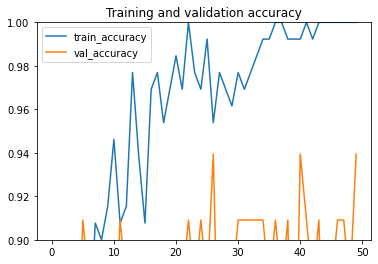

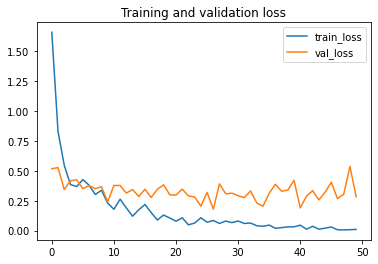

33/33 [==============================] - 3s 85ms/step - loss: 0.2576 - accuracy: 0.9394
Found 130 validated image filenames belonging to 3 classes.
Found 33 validated image filenames belonging to 3 classes.
Epoch 1/50
130/130 [==============================] - 24s 166ms/step - loss: 1.5884 - accuracy: 0.6308 - val_loss: 0.7965 - val_accuracy: 0.8182

Epoch 00001: val_accuracy improved from -inf to 0.81818, saving model to C:/Users/user/Desktop/saved_models\model_2.h5


C:\Users\user\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
130/130 [==============================] - 19s 145ms/step - loss: 0.6407 - accuracy: 0.7923 - val_loss: 0.5365 - val_accuracy: 0.7576

Epoch 00002: val_accuracy did not improve from 0.81818
Epoch 3/50
130/130 [==============================] - 19s 147ms/step - loss: 0.7605 - accuracy: 0.7538 - val_loss: 1.2479 - val_accuracy: 0.5455

Epoch 00003: val_accuracy did not improve from 0.81818
Epoch 4/50
130/130 [==============================] - 19s 145ms/step - loss: 0.5041 - accuracy: 0.8154 - val_loss: 0.4017 - val_accuracy: 0.8182

Epoch 00004: val_accuracy did not improve from 0.81818
Epoch 5/50
130/130 [==============================] - 20s 156ms/step - loss: 0.3539 - accuracy: 0.8615 - val_loss: 0.4857 - val_accuracy: 0.8182

Epoch 00005: val_accuracy did not improve from 0.81818
Epoch 6/50
130/130 [==============================] - 19s 146ms/step - loss: 0.3047 - accuracy: 0.8692 - val_loss: 0.3307 - val_accuracy: 0.8485

Epoch 00006: val_accuracy improved from 0.81818 to


Epoch 00041: val_accuracy improved from 0.93939 to 0.96970, saving model to C:/Users/user/Desktop/saved_models\model_2.h5
Epoch 42/50
130/130 [==============================] - 20s 152ms/step - loss: 0.0317 - accuracy: 0.9846 - val_loss: 0.3173 - val_accuracy: 0.8788

Epoch 00042: val_accuracy did not improve from 0.96970
Epoch 43/50
130/130 [==============================] - 22s 166ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9394

Epoch 00043: val_accuracy did not improve from 0.96970
Epoch 44/50
130/130 [==============================] - 22s 170ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.9091

Epoch 00044: val_accuracy did not improve from 0.96970
Epoch 45/50
130/130 [==============================] - 22s 166ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9697

Epoch 00045: val_accuracy did not improve from 0.96970
Epoch 46/50
130/130 [==============================] - 22s 166ms/step

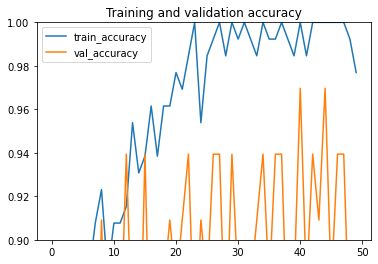

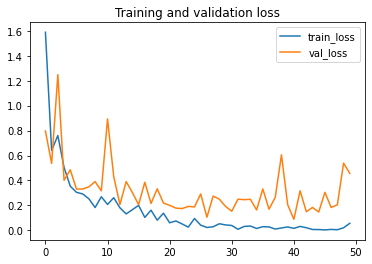

33/33 [==============================] - 3s 96ms/step - loss: 0.1467 - accuracy: 0.9394 1s
Found 130 validated image filenames belonging to 3 classes.
Found 33 validated image filenames belonging to 3 classes.
Epoch 1/50
130/130 [==============================] - 26s 178ms/step - loss: 1.4758 - accuracy: 0.6615 - val_loss: 1.0052 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to C:/Users/user/Desktop/saved_models\model_3.h5


C:\Users\user\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
130/130 [==============================] - 20s 155ms/step - loss: 0.8079 - accuracy: 0.7154 - val_loss: 0.5865 - val_accuracy: 0.6667

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/50
130/130 [==============================] - 20s 153ms/step - loss: 0.6448 - accuracy: 0.7077 - val_loss: 0.4354 - val_accuracy: 0.7273

Epoch 00003: val_accuracy improved from 0.66667 to 0.72727, saving model to C:/Users/user/Desktop/saved_models\model_3.h5
Epoch 4/50
130/130 [==============================] - 21s 163ms/step - loss: 0.5646 - accuracy: 0.7462 - val_loss: 0.3359 - val_accuracy: 0.8485

Epoch 00004: val_accuracy improved from 0.72727 to 0.84848, saving model to C:/Users/user/Desktop/saved_models\model_3.h5
Epoch 5/50
130/130 [==============================] - 21s 159ms/step - loss: 0.5381 - accuracy: 0.8231 - val_loss: 0.4235 - val_accuracy: 0.8485

Epoch 00005: val_accuracy did not improve from 0.84848
Epoch 6/50
130/130 [==============================] - 20s 156m

130/130 [==============================] - 19s 150ms/step - loss: 0.0358 - accuracy: 0.9923 - val_loss: 0.3581 - val_accuracy: 0.8788

Epoch 00041: val_accuracy did not improve from 0.96970
Epoch 42/50
130/130 [==============================] - 23s 176ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.2241 - val_accuracy: 0.8788

Epoch 00042: val_accuracy did not improve from 0.96970
Epoch 43/50
130/130 [==============================] - 21s 162ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.3233 - val_accuracy: 0.9091

Epoch 00043: val_accuracy did not improve from 0.96970
Epoch 44/50
130/130 [==============================] - 20s 154ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.1967 - val_accuracy: 0.9091

Epoch 00044: val_accuracy did not improve from 0.96970
Epoch 45/50
130/130 [==============================] - 21s 161ms/step - loss: 0.0302 - accuracy: 0.9923 - val_loss: 0.3004 - val_accuracy: 0.8788

Epoch 00045: val_accuracy did not improve from 0.96970
Ep

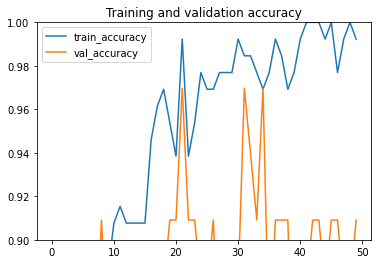

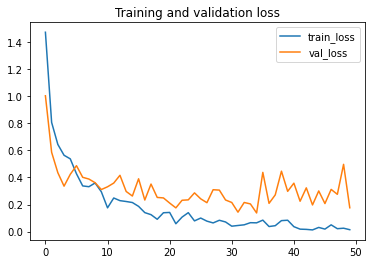

33/33 [==============================] - 3s 97ms/step - loss: 0.2020 - accuracy: 0.9394
Found 131 validated image filenames belonging to 3 classes.
Found 32 validated image filenames belonging to 3 classes.
Epoch 1/50
131/131 [==============================] - 27s 169ms/step - loss: 1.5688 - accuracy: 0.6565 - val_loss: 0.5891 - val_accuracy: 0.7812

Epoch 00001: val_accuracy improved from -inf to 0.78125, saving model to C:/Users/user/Desktop/saved_models\model_4.h5


C:\Users\user\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
131/131 [==============================] - 21s 162ms/step - loss: 0.6488 - accuracy: 0.7481 - val_loss: 0.5048 - val_accuracy: 0.7812

Epoch 00002: val_accuracy did not improve from 0.78125
Epoch 3/50
131/131 [==============================] - 21s 157ms/step - loss: 0.4840 - accuracy: 0.8168 - val_loss: 0.6797 - val_accuracy: 0.6562

Epoch 00003: val_accuracy did not improve from 0.78125
Epoch 4/50
131/131 [==============================] - 20s 156ms/step - loss: 0.4396 - accuracy: 0.8092 - val_loss: 0.4803 - val_accuracy: 0.8438

Epoch 00004: val_accuracy improved from 0.78125 to 0.84375, saving model to C:/Users/user/Desktop/saved_models\model_4.h5
Epoch 5/50
131/131 [==============================] - 20s 155ms/step - loss: 0.3317 - accuracy: 0.8626 - val_loss: 0.4170 - val_accuracy: 0.8438

Epoch 00005: val_accuracy did not improve from 0.84375
Epoch 6/50
131/131 [==============================] - 21s 157ms/step - loss: 0.3327 - accuracy: 0.8626 - val_loss: 0.6036 - val_a

131/131 [==============================] - 21s 159ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.6691 - val_accuracy: 0.9062

Epoch 00041: val_accuracy did not improve from 0.93750
Epoch 42/50
131/131 [==============================] - 21s 158ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.4614 - val_accuracy: 0.8750

Epoch 00042: val_accuracy did not improve from 0.93750
Epoch 43/50
131/131 [==============================] - 20s 154ms/step - loss: 0.0198 - accuracy: 0.9924 - val_loss: 0.5602 - val_accuracy: 0.8750

Epoch 00043: val_accuracy did not improve from 0.93750
Epoch 44/50
131/131 [==============================] - 21s 160ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.6772 - val_accuracy: 0.8750

Epoch 00044: val_accuracy did not improve from 0.93750
Epoch 45/50
131/131 [==============================] - 21s 157ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.7546 - val_accuracy: 0.8750

Epoch 00045: val_accuracy did not improve from 0.93750
Ep

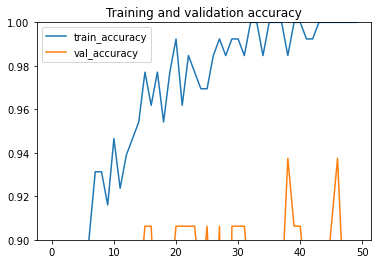

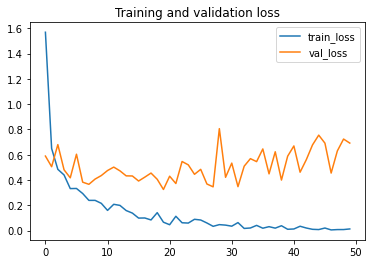

32/32 [==============================] - 3s 102ms/step - loss: 0.5753 - accuracy: 0.9062
Found 131 validated image filenames belonging to 3 classes.
Found 32 validated image filenames belonging to 3 classes.
Epoch 1/50
131/131 [==============================] - 27s 177ms/step - loss: 1.4600 - accuracy: 0.5725 - val_loss: 0.9185 - val_accuracy: 0.5625

Epoch 00001: val_accuracy improved from -inf to 0.56250, saving model to C:/Users/user/Desktop/saved_models\model_5.h5


C:\Users\user\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
131/131 [==============================] - 21s 163ms/step - loss: 0.8826 - accuracy: 0.6412 - val_loss: 0.3591 - val_accuracy: 0.9062

Epoch 00002: val_accuracy improved from 0.56250 to 0.90625, saving model to C:/Users/user/Desktop/saved_models\model_5.h5
Epoch 3/50
131/131 [==============================] - 22s 171ms/step - loss: 0.6397 - accuracy: 0.7557 - val_loss: 0.3882 - val_accuracy: 0.8750

Epoch 00003: val_accuracy did not improve from 0.90625
Epoch 4/50
131/131 [==============================] - 22s 170ms/step - loss: 0.4960 - accuracy: 0.7863 - val_loss: 0.2959 - val_accuracy: 0.8438

Epoch 00004: val_accuracy did not improve from 0.90625
Epoch 5/50
131/131 [==============================] - 21s 163ms/step - loss: 0.4362 - accuracy: 0.8244 - val_loss: 0.2593 - val_accuracy: 0.9062

Epoch 00005: val_accuracy did not improve from 0.90625
Epoch 6/50
131/131 [==============================] - 21s 158ms/step - loss: 0.3570 - accuracy: 0.8626 - val_loss: 0.3282 - val_a

131/131 [==============================] - 19s 143ms/step - loss: 0.0284 - accuracy: 0.9924 - val_loss: 0.1755 - val_accuracy: 0.9062

Epoch 00041: val_accuracy did not improve from 1.00000
Epoch 42/50
131/131 [==============================] - 21s 162ms/step - loss: 0.0549 - accuracy: 0.9771 - val_loss: 0.2431 - val_accuracy: 0.9375

Epoch 00042: val_accuracy did not improve from 1.00000
Epoch 43/50
131/131 [==============================] - 22s 168ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9375

Epoch 00043: val_accuracy did not improve from 1.00000
Epoch 44/50
131/131 [==============================] - 20s 150ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9062

Epoch 00044: val_accuracy did not improve from 1.00000
Epoch 45/50
131/131 [==============================] - 19s 147ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2116 - val_accuracy: 0.9062

Epoch 00045: val_accuracy did not improve from 1.00000
Ep

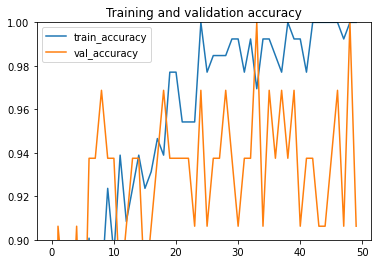

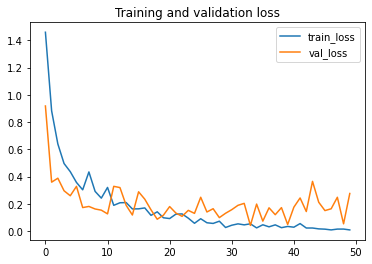

32/32 [==============================] - 3s 96ms/step - loss: 0.0739 - accuracy: 0.9688


TypeError: can only concatenate str (not "list") to str

In [14]:
#initialize parameters
VALIDATION_ACCURACY = []                          #store all validation_accuracy
VALIDATION_LOSS = []                              #store all validation_loss
image_dir = tr                                    #where the train set images are stored
batch_size = 32                                   #batch size
fold_var = 1                                      #number of fold of the model to be called back
n = len(df2)                                      #number of data in train set
num_epochs = 100                                  #number of epochs
dim = (224,224)                                   #required dimensions for process_unit (ResNet50)


#===========if exist, create new one for another set of models with new parameters======================

#directory where models per set parameters are stored
gen_dir = "C:/Users/user/Desktop"

save_cur = ""  #check if there is any saved_models folders

for x in os.listdir(gen_dir):
    if "saved_models" in x:
        print(x)
        save_cur = x

#save_dir is where the created models using the current set of parameters are added        
        
if save_cur == "":
    save_dir = gen_dir + "/saved_models1"
    #print(save_dir)
    #os.makedirs(save_dir)
else:
    save_dir = gen_dir + "/saved_models" + str(int(save_cur[-1]) + 1)
    #print(save_dir)
    #os.makedirs(save_dir)

#=========================================================================================================    
    
for train_index, val_index in kf.split(np.zeros(n),Y):
    training_data = df2.iloc[train_index]
    validation_data = df2.iloc[val_index]

    train_data_generator = imgdatagen.flow_from_dataframe(training_data, directory = image_dir,
                               x_col = "filename", y_col = "label",
                              class_mode = "categorical", target_size = dim, batch_size = batch_size,
                                shuffle = True)
    valid_data_generator  = imgdatagen.flow_from_dataframe(validation_data, directory = image_dir,
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", target_size = dim, batch_size = batch_size,
                                shuffle = True)

    # CREATE NEW MODEL
    conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
    for layer in conv_model.layers:
        layer.trainable = False
    x = keras.layers.Flatten()(conv_model.output)
    x = keras.layers.Dense(100, activation='relu')(x)
    x = keras.layers.Dense(100, activation='relu')(x)
    #x = keras.layers.Dense(100, activation='relu')(x)

    x = keras.layers.Dropout(0.2)(x) #to further reduce overfitting

    predictions = keras.layers.Dense(3, activation='softmax')(x)
    full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
    
    # COMPILE NEW MODEL
    full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(learning_rate=0.0001),
                  metrics=['accuracy']) #categorical_crossentropy cause it is more than 2 classes

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+"/"+get_model_name(fold_var), 
                            monitor='val_accuracy', verbose=1, 
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
   
    print("Fold number " + fold_var)

    # FIT THE MODEL
    history = full_model.fit(train_data_generator,
                epochs=num_epochs,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    
    #PLOT HISTORY
    plot_history(history, yrange=(0.9,1))

    # LOAD BEST MODEL to evaluate the performance of the model
    full_model.load_weights(save_dir+"/model_"+str(fold_var)+".h5")
    
    results = full_model.evaluate(valid_data_generator)
    results = dict(zip(full_model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1    

In [15]:
print("Validation Accuracy of All Folds:")
print(VALIDATION_ACCURACY)
print("Validation Loss of All Folds:")
print(VALIDATION_LOSS)

Validation Accuracy of All Folds:
[0.939393937587738, 0.939393937587738, 0.939393937587738, 0.90625, 0.96875]
Validation Loss of All Folds:
[0.2575978636741638, 0.146714985370636, 0.20204363763332367, 0.575307309627533, 0.07393357157707214]


## Data Augmentation

We will be applying data augmentation in order to make the model more robust and accurate.

In [ ]:
batch_size = 1

def generators(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True,
        vertical_flip = True,
        validation_split = 0.3,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ('Salted egg2','Balut-penoy2','Table egg2'),
        batch_size = batch_size,
        subset = 'training',
        seed = 42
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ('Salted egg2','Balut-penoy2','Table egg2'),
        batch_size = batch_size,
        subset = 'validation',
        seed = 42
    )
    
    return train_dataset, val_dataset

## Plot accuracy and loss as a function of the epoch

The functon below will graph the training and validation accuracy, as well as the training and validation loss of the training and testing of the model

In [ ]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show() 

## Split the data to Train and Test Set

split the dataset to train and test set with a preprocessing function of resnet50.preprocess_input for ResNet50 will be used.

In [ ]:
resnet50 = keras.applications.resnet50
directory2 = directory + "/CombinedTwoAngleEggs"
os.chdir(directory2)
train_dataset, val_dataset = generators((224,224), preprocessing=resnet50.preprocess_input)

In [ ]:
print(train_dataset[0][1])

## Add Custom Classifier

remove the classifier from the ResNet50 architecture and add a new one that will give the desired output (balut/penoy, salted egg, table egg)

In [ ]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
#x = keras.layers.Dense(100, activation='relu')(x)

x = keras.layers.Dropout(0.2)(x) #to further reduce overfitting

predictions = keras.layers.Dense(3, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

## Train the Model

After that, we will train the model.

In [ ]:
#compile the model
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.0001),
                  metrics=['accuracy']) #categorical_crossentropy cause it is more than 2 classes   
    
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=100,
) meron ata teka

In [ ]:
plot_history(history, yrange=(0.9,1))

## Train the model using K-fold Cross Validation

Another way to train the model is to use K-fold Cross Validation. We will set the number of folds to 5.

In [ ]:
batch_size = 10

def generators2(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True,
        vertical_flip = True,
    )

    height, width = shape

    augmented = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ('Salted egg2','Balut-penoy2','Table egg2'),
        batch_size = batch_size,
        seed = 42
    )
    
    return augmented

In [ ]:
print(os.getcwd())

In [ ]:
#augmented = generators2((224,224),preprocessing=resnet50.preprocess_input)

In [ ]:
print(train_dataset[0])

In [ ]:
#compile the model
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.0001),
                  metrics=['accuracy']) #categorical_crossentropy cause it is more than 2 classes

# define 10-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []

#print(kfold.split(augmented))

for train, test in kfold.split(train_dataset):
    #compile the model
    full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.0001),
                  metrics=['accuracy']) #categorical_crossentropy cause it is more than 2 classes
    
    print("TRAIN:\n" + str(train))
    print("TEST:\n" + str(test))
    
    #print(augmented[train])
    
    history = full_model.fit_generator(
        train, 
        validation_data = test,
        workers=10,
        epochs=1,
    )
    
    #plot_history(history, yrange=(0.9,1))

In [ ]:
print(train_dataset[0])

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x):
    print (train_index, test_index)

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 1, 1, 0])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Save and Load The Model

https://www.tensorflow.org/guide/keras/save_and_serialize

we will save the trained model and load it for model prediction/evaluation.

In [ ]:
#save model to same directory as the notebook
full_model.save('duckEggQual_model')

#load the model
reconstructed_model = keras.models.load_model('duckEggQual_model')

## Model Evaluation

we will now evaluate the model by predicting a selected image of its category.

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

img_path = 'C:\Users\user\Desktop\Dataset\CombinedTwoAngleEggs\Balut-penoy2'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(full_model.predict(x))
plt.imshow(img)